In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Summary

In [3]:
df = pd.read_excel('card transactions.xlsx')

In [4]:
df.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96753 entries, 0 to 96752
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Recnum             96753 non-null  int64         
 1   Cardnum            96753 non-null  int64         
 2   Date               96753 non-null  datetime64[ns]
 3   Merchnum           93378 non-null  object        
 4   Merch description  96753 non-null  object        
 5   Merch state        95558 non-null  object        
 6   Merch zip          92097 non-null  float64       
 7   Transtype          96753 non-null  object        
 8   Amount             96753 non-null  float64       
 9   Fraud              96753 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 7.4+ MB


In [6]:
df[['Cardnum','Merch zip','Fraud']] = df[['Cardnum','Merch zip','Fraud']].astype('object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96753 entries, 0 to 96752
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Recnum             96753 non-null  int64         
 1   Cardnum            96753 non-null  object        
 2   Date               96753 non-null  datetime64[ns]
 3   Merchnum           93378 non-null  object        
 4   Merch description  96753 non-null  object        
 5   Merch state        95558 non-null  object        
 6   Merch zip          92097 non-null  object        
 7   Transtype          96753 non-null  object        
 8   Amount             96753 non-null  float64       
 9   Fraud              96753 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 7.4+ MB


In [8]:
df.shape

(96753, 10)

In [9]:
df.columns

Index(['Recnum', 'Cardnum', 'Date', 'Merchnum', 'Merch description',
       'Merch state', 'Merch zip', 'Transtype', 'Amount', 'Fraud'],
      dtype='object')

In [10]:
numeric = ['Recnum', 'Amount']
category = ['Cardnum','Merchnum','Merch description','Merch state','Merch zip','Transtype','Fraud']
date_time = ['Date']

In [11]:
def num_stat():
    stat = []
    for col in numeric:
        stat.append((col,
                    'numerical',
                    df[col].count(),
                     (1 - (df[col].isnull().sum()/df.shape[0]))*100,
                     df[col].loc[df[col]==0].count(),
                     df[col].min(),
                     df[col].max(),
                     df[col].std(),
                     df[col].mean()
                     ))
        stats_df = pd.DataFrame(stat, 
                        columns=['Feature', 'Data Type', '# of Records', 
                                 '% populated', '# of Zeros', 'Min', 'Max', 'STD', 'Mean' ])
    return stats_df

In [12]:
def category_stat():
    stat = []
    for col in category:
        stat.append((col,
                    'categorical',
                    df[col].count(),
                     df[col].nunique(),
                     (1 - (df[col].isnull().sum()/df.shape[0]))*100,
                     df[col].loc[(df[col]==0) | (df[col]=='0')].count(),
                     df[col].value_counts().index[0]
                     ))
        stats_df = pd.DataFrame(stat, 
                        columns=['Feature', 'Data Type', '# of Records','Uniq_val', 
                                 '% populated', '# of Zeros', 'Most Common Value'])
    return stats_df

In [13]:
def date_stat():  
    stat = []
    for col in date_time:
        stat.append((col,
                     'date_time',
                     df[col].count(),
                     (1 - (df[col].isnull().sum()/df.shape[0]))*100,
                     df[col].loc[df[col]==0].count(),
                     df[col].min(),
                     df[col].max(),
                     df[col].value_counts().index[0]
                     ))
    stats_df = pd.DataFrame(stat, 
                        columns=['Feature', 'Data Type', '# of Records', 
                                 '% populated', '# of Zeros', 'Min', 'Max','Most Common Value'])
    return stats_df

In [28]:
stat_num = num_stat()

In [29]:
stat_num

,Feature,Data Type,# of Records,% populated,# of Zeros,Min,Max,STD,Mean
0,Recnum,numerical,96753,100.0,0,1.00,96753.00,27930.329635,48377.000000
1,Amount,numerical,96753,100.0,0,0.01,3102045.53,10006.140302,427.885677


In [30]:
#stat_num.to_csv('stat_num.csv')

In [14]:
stat_category = category_stat()
stat_category

,Feature,Data Type,# of Records,Uniq_val,% populated,# of Zeros,Most Common Value
0,Cardnum,categorical,96753,1645,100.000000,0,5142148452
1,Merchnum,categorical,93378,13091,96.511736,231,930090121224
2,Merch description,categorical,96753,13126,100.000000,0,GSA-FSS-ADV
3,Merch state,categorical,95558,227,98.764896,0,TN
4,Merch zip,categorical,92097,4567,95.187746,0,38118
5,Transtype,categorical,96753,4,100.000000,0,P
6,Fraud,categorical,96753,2,100.000000,95694,0


In [ ]:
# stat_category.to_csv('stat_category.csv')

In [39]:
stat_date = date_stat()
stat_date

,Feature,Data Type,# of Records,% populated,# of Zeros,Min,Max,Most Common Value
0,Date,date_time,96753,100.0,0,2010-01-01,2010-12-31,2010-02-28


In [40]:
#stat_date.to_csv('stat_date.csv')

### Data Field Exploration

In [177]:
def dist_plot(field,number,scale):
    temp= pd.DataFrame(df[field].value_counts())
    temp.columns = ['count']
    
    plt.figure(figsize = (10,5))
    y = list(temp.iloc[:number].values)
    temp.iloc[:number].plot(kind = 'bar')
    plt.xticks(rotation=60)
    plt.yscale(scale)
    plt.title('Top ' + str(number)+ ' Frequent '+str(field), fontweight = 'bold', fontsize = 15)
    plt.xlabel(field,fontweight = 'bold',fontsize = 13)
    plt.ylabel('Count',fontweight = 'bold',fontsize = 13)
    
    for index, value in enumerate(y):
        plt.text(index, value + 0.05, '%.0f' % value, ha = 'center', va = 'bottom', 
                 fontsize = 8, fontweight = 'bold')

**Date**

In [43]:
date_cnt = df.groupby('Date')['Recnum'].count()
date_cnt

Date
2010-01-01     51
2010-01-02     29
2010-01-03    159
2010-01-04    229
2010-01-05    309
             ... 
2010-12-27    199
2010-12-28    216
2010-12-29    263
2010-12-30    200
2010-12-31     53
Name: Recnum, Length: 365, dtype: int64

Text(0, 0.5, 'Count')

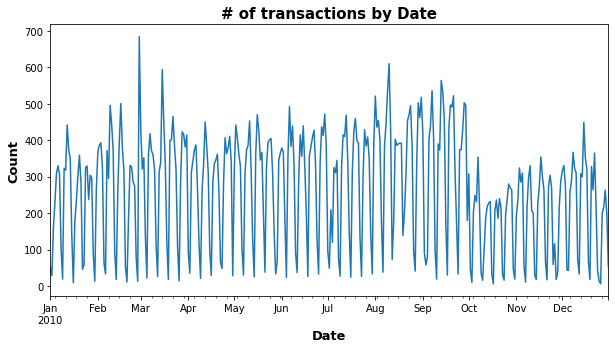

In [167]:
plt.figure(figsize = (10,5))
date_cnt.plot(kind = 'line')
plt.title('# of transactions by Date', fontweight = 'bold', fontsize = 15)
plt.xlabel('Date',fontweight = 'bold',fontsize = 13)
plt.ylabel('Count',fontweight = 'bold',fontsize = 13)

Text(0, 0.5, 'Count')

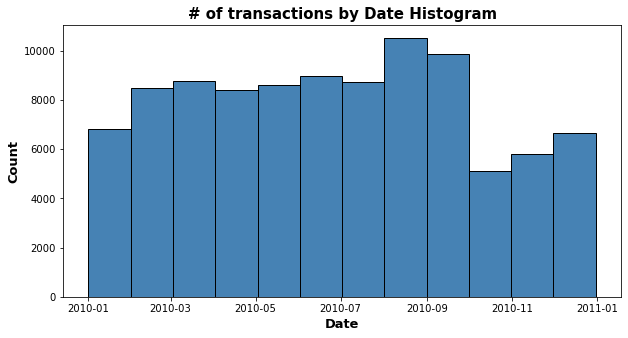

In [166]:
plt.figure(figsize = (10,5))
plt.hist(x=df['Date'],bins=12, color="steelblue", edgecolor = 'black')
plt.title('# of transactions by Date Histogram', fontweight = 'bold', fontsize = 15)
plt.xlabel('Date',fontweight = 'bold',fontsize = 13)
plt.ylabel('Count',fontweight = 'bold',fontsize = 13)

**Amount**

In [184]:
df_temp = df['Amount'].sort_values().iloc[:round(df.shape[0]*0.98)]

Text(0, 0.5, 'Density')

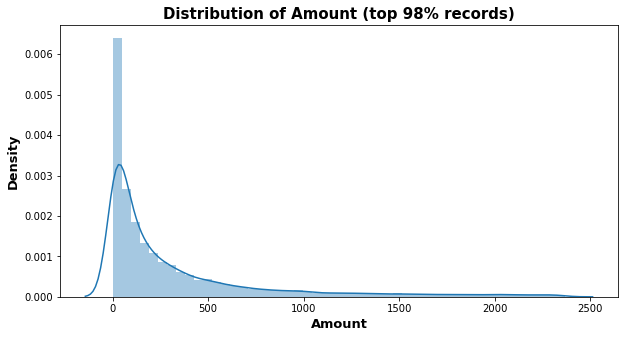

In [187]:
plt.figure(figsize = (10,5))
sns.distplot(df_temp, norm_hist = False)
#plt.yscale('log')
plt.title('Distribution of Amount (top 98% records)', fontweight = 'bold', fontsize = 15)
plt.xlabel('Amount',fontweight = 'bold',fontsize = 13)
plt.ylabel('Density',fontweight = 'bold',fontsize = 13)

**Merchnum**

<Figure size 720x360 with 0 Axes>

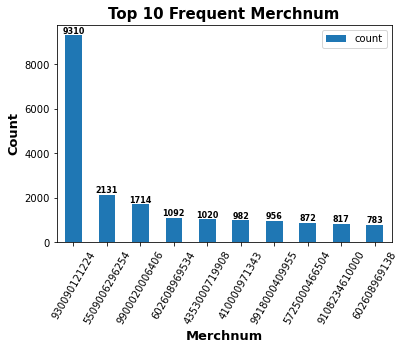

In [178]:
dist_plot('Merchnum',10,'linear')

**Merch description**

<Figure size 720x360 with 0 Axes>

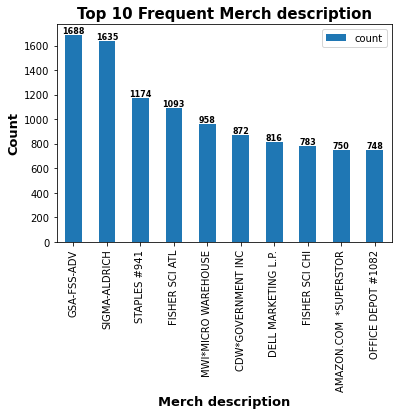

In [197]:
temp= pd.DataFrame(df['Merch description'].value_counts())
temp.columns = ['count']

plt.figure(figsize = (10,5))
y = list(temp.iloc[:10].values)
temp.iloc[:10].plot(kind = 'bar')
plt.xticks(rotation=90)
plt.yscale('linear')
plt.title('Top 10 Frequent Merch description', fontweight = 'bold', fontsize = 15)
plt.xlabel('Merch description',fontweight = 'bold',fontsize = 13)
plt.ylabel('Count',fontweight = 'bold',fontsize = 13)

for index, value in enumerate(y):
    plt.text(index, value + 0.05, '%.0f' % value, ha = 'center', va = 'bottom', 
             fontsize = 8, fontweight = 'bold')

**Merch State**

<Figure size 1080x720 with 0 Axes>

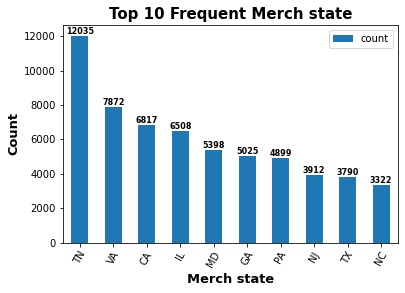

In [147]:
dist_plot('Merch state',10,'linear')

**Merch zip**

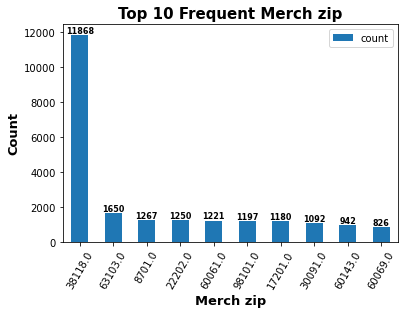

In [169]:
dist_plot('Merch zip',10,'linear')

**Transtype**

<Figure size 720x360 with 0 Axes>

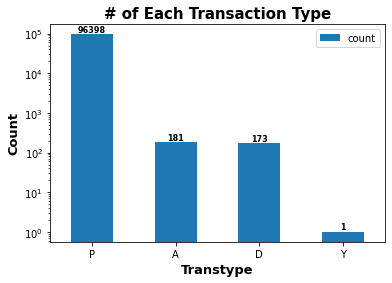

In [193]:
temp= pd.DataFrame(df['Transtype'].value_counts())
temp.columns = ['count']

plt.figure(figsize = (10,5))
y = list(temp.values)
temp.plot(kind = 'bar')
plt.xticks(rotation=360)
plt.yscale('log')
plt.title('# of Each Transaction Type', fontweight = 'bold', fontsize = 15)
plt.xlabel('Transtype',fontweight = 'bold',fontsize = 13)
plt.ylabel('Count',fontweight = 'bold',fontsize = 13)

for index, value in enumerate(y):
    plt.text(index, value + 0.05, '%.0f' % value, ha = 'center', va = 'bottom', 
             fontsize = 8, fontweight = 'bold')

**Cardnum**

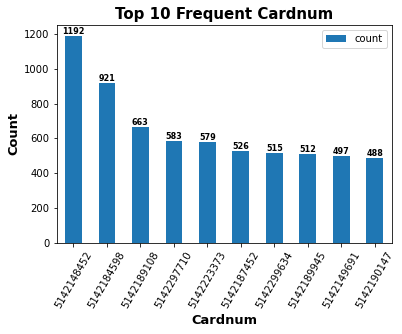

In [174]:
dist_plot('Cardnum',10,'linear')

**Fraud Label**

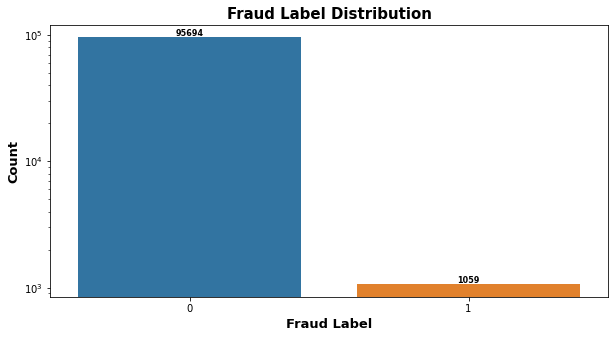

In [158]:
plt.figure(figsize = (10,5))
y = list(df['Fraud'].value_counts().values)
sns.countplot(x = 'Fraud', data = df)
plt.yscale('log')
plt.title('Fraud Label Distribution', fontweight = 'bold', fontsize = 15)
plt.xlabel('Fraud Label',fontweight = 'bold',fontsize = 13)
plt.ylabel('Count',fontweight = 'bold',fontsize = 13)
for index, value in enumerate(y):
    plt.text(index, value + 0.05, '%.0f' % value, ha = 'center', va = 'bottom', fontsize = 8, fontweight = 'bold')